In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
X = df[['koi_period', 'koi_time0bk']]
y = df[["koi_disposition"]]
print(X.shape, y.shape)

(6991, 2) (6991, 1)


In [7]:
y = df.pop("koi_disposition")
X = df
print(X.shape, y.shape)

(6991, 40) (6991,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data

In [11]:
from sklearn.preprocessing import MinMaxScaler

X_scaler_train = MinMaxScaler().fit_transform(X_train)
X_scaler_test = MinMaxScaler().fit_transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(max_iter=150000)
model

LogisticRegression(max_iter=150000)

In [13]:
model.fit(X_scaler_train, y_train)

LogisticRegression(max_iter=150000)

# Train the Model



In [14]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_scaler_train, y_train)

SVC(kernel='linear')

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [16]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {
              'C': [1, 5, 10, 50]}
#                'gamma': [0.0001, 0.005, 0.001, 0.00, 5]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [17]:
# Train the model with GridSearch

In [18]:
grid.fit(X_scaler_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............................C=1;, score=0.858 total time=   0.5s
[CV 2/5] END ...............................C=1;, score=0.833 total time=   0.7s
[CV 3/5] END ...............................C=1;, score=0.855 total time=   0.5s
[CV 4/5] END ...............................C=1;, score=0.832 total time=   0.6s
[CV 5/5] END ...............................C=1;, score=0.835 total time=   0.5s
[CV 1/5] END ...............................C=5;, score=0.875 total time=   0.5s
[CV 2/5] END ...............................C=5;, score=0.851 total time=   0.6s
[CV 3/5] END ...............................C=5;, score=0.872 total time=   0.5s
[CV 4/5] END ...............................C=5;, score=0.850 total time=   0.5s
[CV 5/5] END ...............................C=5;, score=0.861 total time=   0.6s
[CV 1/5] END ..............................C=10;, score=0.891 total time=   0.6s
[CV 2/5] END ..............................C=10;,

GridSearchCV(estimator=SVC(kernel='linear'), param_grid={'C': [1, 5, 10, 50]},
             verbose=3)

In [20]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50}
0.8823155822702828


# RBF Classifier

In [21]:
model2 = SVC(kernel='rbf')
model2.fit(X_scaler_train, y_train)

SVC()

In [22]:
print(f"Training Data Score: {model2.score(X_scaler_train, y_train)}")
print(f"Testing Data Score: {model2.score(X_scaler_test, y_test)}")

Training Data Score: 0.831012778943353
Testing Data Score: 0.8329519450800915


In [23]:
param_grid = {
              'C': [1, 5, 10, 50]}
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [24]:
grid2.fit(X_scaler_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............................C=1;, score=0.837 total time=   1.0s
[CV 2/5] END ...............................C=1;, score=0.821 total time=   0.9s
[CV 3/5] END ...............................C=1;, score=0.847 total time=   1.0s
[CV 4/5] END ...............................C=1;, score=0.811 total time=   0.9s
[CV 5/5] END ...............................C=1;, score=0.824 total time=   0.9s
[CV 1/5] END ...............................C=5;, score=0.859 total time=   0.9s
[CV 2/5] END ...............................C=5;, score=0.840 total time=   1.0s
[CV 3/5] END ...............................C=5;, score=0.857 total time=   1.1s
[CV 4/5] END ...............................C=5;, score=0.832 total time=   1.0s
[CV 5/5] END ...............................C=5;, score=0.844 total time=   1.2s
[CV 1/5] END ..............................C=10;, score=0.863 total time=   1.1s
[CV 2/5] END ..............................C=10;,

GridSearchCV(estimator=SVC(), param_grid={'C': [1, 5, 10, 50]}, verbose=3)

In [25]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 50}
0.8752566966722215


# Make Predictions

Calculate classification report from sklearn.metrics

In [26]:
predictions = grid.predict(X_scaler_test)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=["Candidate","False Positive","Confirmed"]))

                precision    recall  f1-score   support

     Candidate       0.83      0.62      0.71       411
False Positive       0.74      0.88      0.80       484
     Confirmed       0.98      1.00      0.99       853

      accuracy                           0.88      1748
     macro avg       0.85      0.83      0.83      1748
  weighted avg       0.88      0.88      0.87      1748



# Apply KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

k:1, Train/Test/Accuracy Score: 1.000/0.800/0.7998
k:3, Train/Test/Accuracy Score: 0.897/0.814/0.8135
k:5, Train/Test/Accuracy Score: 0.878/0.811/0.8112
k:7, Train/Test/Accuracy Score: 0.866/0.815/0.8146
k:9, Train/Test/Accuracy Score: 0.856/0.819/0.8186
k:11, Train/Test/Accuracy Score: 0.848/0.820/0.8198
k:13, Train/Test/Accuracy Score: 0.849/0.815/0.8146
k:15, Train/Test/Accuracy Score: 0.841/0.820/0.8204
k:17, Train/Test/Accuracy Score: 0.838/0.819/0.8186
k:19, Train/Test/Accuracy Score: 0.836/0.819/0.8192
k:21, Train/Test/Accuracy Score: 0.839/0.819/0.8192
k:23, Train/Test/Accuracy Score: 0.840/0.819/0.8186
k:25, Train/Test/Accuracy Score: 0.837/0.816/0.8158
k:27, Train/Test/Accuracy Score: 0.836/0.818/0.8175
k:29, Train/Test/Accuracy Score: 0.835/0.819/0.8192


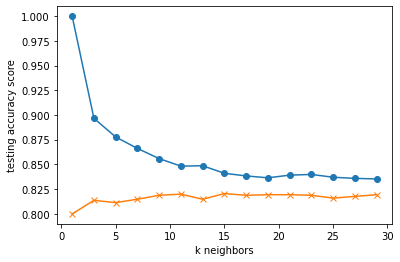

In [29]:
# Create empty lists for train_scores and test_scores
train_scores = []
test_scores = []

#Loop through range to get Train/Test and accuracy scores
for k in range (1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_scaler_train, y_train)
    train_score = knn.score(X_scaler_train, y_train)
    test_score = knn.score(X_scaler_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    pred_y = knn.predict(X_scaler_test)
    accuracy = metrics.accuracy_score(y_test, pred_y)
    print(f"k:{k}, Train/Test/Accuracy Score: {train_score:.3f}/{test_score:.3f}/{accuracy:.4f}")
    
#Plot Train/Test Scores

plt.plot(range(1,30,2), train_scores, marker='o')
plt.plot(range(1,30,2), test_scores, marker = 'x')
plt.xlabel("k neighbors")
plt.ylabel("testing accuracy score")
plt.show()

# Use Grid Search with Classification Report to determine best value

In [30]:
parameters = { 'n_neighbors': range(1, 30, 2) }
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, verbose=3)

In [31]:
# Fit the model using the grid search estimator. 
# This takes the SVC model and tries each combination of parameters
clf.fit(X_scaler_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.791 total time=   0.1s
[CV 2/5] END .....................n_neighbors=1;, score=0.787 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.776 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.791 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.781 total time=   0.1s
[CV 1/5] END .....................n_neighbors=3;, score=0.827 total time=   0.1s
[CV 2/5] END .....................n_neighbors=3;, score=0.803 total time=   0.1s
[CV 3/5] END .....................n_neighbors=3;, score=0.800 total time=   0.1s
[CV 4/5] END .....................n_neighbors=3;, score=0.805 total time=   0.1s
[CV 5/5] END .....................n_neighbors=3;, score=0.807 total time=   0.1s
[CV 1/5] END .....................n_neighbors=5;, score=0.825 total time=   0.1s
[CV 2/5] END .....................n_neighbors=5;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30, 2)}, verbose=3)

In [32]:
print(clf.best_params_)

{'n_neighbors': 21}


In [33]:
print(clf.best_score_)

0.8222367358225574


# Save the Model

In [34]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'dunkingray.h5'
joblib.dump(model, filename)

['dunkingray.h5']

# Load the Model

In [36]:
exoplanet_model = joblib.load('dunkingray.h5')
exoplanet_model

SVC(kernel='linear')